1. [Importing Libraries](#importing-libraries)
2. [Loading Datasets](#loading-datasets)
3. [Understanding Datasets](#understanding-datasets)
4. [Data Cleaning](#data-cleasning)
5. [Transforming Data](#transforming-data)
6. [EDA Dataset `df_customer`](#eda-dataset-df_customer)
7. [EDA Dataset `df_transcript`](#eda-dataset-df_transcript)
8. [Merging Datasets](#merging-datasets)
9. [EDA dataset `df_final`](#eda-dataset-df_final)
10. [EDA Dataset `df_final_transaction`](#eda-dataset-df_final_transaction)
11. [Handling Outliers (3-sigma)](#handling-outliers-(3-sigma))
12. [Analysis Correlation in Transactional Dataset](#analysis-correlation-in-transactional-dataset)
13. [Confidence Interval, Sample Size Determination, Standard Error](#confidence-interval,-sample-size-determination,-standard-error)
14. [Hypothesis Testing for `value` by `gender`](#hypothesis-testing-for-value-by-gender)
15. [Post Hoc Analysis](#post-hoc-analysis)

# Importing Libraries
- Import libraries `numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`, `sklearn`, `xgboost`

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from xgboost import XGBRegressor

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

# Loading Datasets
- Load raw dataset `sb_portfolio.csv`, `sb_profile.csv`, `sb_transcript.csv`
- kaggle dataset: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data

In [10]:
df_offer = pd.read_csv('~/aiffel/data/sb_portfolio.csv')
df_offer.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [11]:
df_customer = pd.read_csv('~/aiffel/data/sb_profile.csv')
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [12]:
df_transcript = pd.read_csv('~/aiffel/data/sb_transcript.csv')
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# Understanding Datasets
- `sb_portfolio.csv` : promotions offered
- `sb_profile.csv` : customer information
- `sb_transcript.csv` : transaction and the result of promotion

In [13]:
# Understand the df_offer dataset
df_offer.info()
df_offer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


In [14]:
# Understand the df_customer dataset
df_customer.info()
df_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


In [15]:
# Understand the df_transcript dataset
df_transcript.info()
df_transcript.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


# Data Cleaning
- Removing unnecessary column `Unnamed: 0`
- Drop records of missing `gender` and `income` from the dataset `df_customer`

In [16]:
# Drop 'Unnamed:0' column from the datasets
df_offer.drop('Unnamed: 0', axis = 1, inplace = True)
df_customer.drop('Unnamed: 0', axis = 1, inplace = True)
df_transcript.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
# Check missing data in the datasets
df_offer.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [18]:
df_customer.isnull().sum() # Missing data in 'gender' and 'income' columns

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [19]:
missing_gender = df_customer[df_customer['gender'].isnull()]
missing_income = df_customer[df_customer['income'].isnull()]
np.sum(missing_gender['id'] == missing_income['id']) # Same missing data in 'gender' and 'income' columns

2175

In [20]:
# Drop 'gender' and 'income' missing data from the dataset df_customer
df_customer.drop(df_customer[df_customer['gender'].isnull()].index, inplace=True)

In [21]:
df_customer.isnull().sum() # No more missing data in the dataset df_customer

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [22]:
df_transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [23]:
df_offer.info()
df_offer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [24]:
df_customer.info()
df_customer.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


,gender,age,id,became_member_on,income
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0
16999,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0


# Transforming Data
- Change datatype of `became_member_on` to datetime 
- Change column name `time` to `hours_since_start`
- Devide column `value` to `key` & `value`

In [25]:
df_customer['became_member_on'] = pd.to_datetime(df_customer['became_member_on'], format = '%Y%m%d')

In [26]:
df_customer.info()
df_customer.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [27]:
df_transcript.info()
df_transcript.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [28]:
# Rename 'time' to 'hours_since_start' in the df_transcript dataset
df_transcript.rename(columns = {'time': 'hours_since_start'}, inplace = True)

In [29]:
df_transcript.head()

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [30]:
import json

# Function to convert string to dictionary and extract key and value
def extract_key_value(value_str):
    value_str = value_str.replace("'", '"')  # Convert single quotes to double quotes for valid JSON
    value_dict = json.loads(value_str)
    key = list(value_dict.keys())[0]
    value = list(value_dict.values())[0]
    return key, value

# Apply the function to the 'value' column
df_transcript['key'], df_transcript['value'] = zip(*df_transcript['value'].apply(extract_key_value))

df_transcript.head()

,person,event,value,hours_since_start,key
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id


# EDA Dataset `df_customer`

In [31]:
df_customer.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


<Axes: xlabel='age', ylabel='Count'>

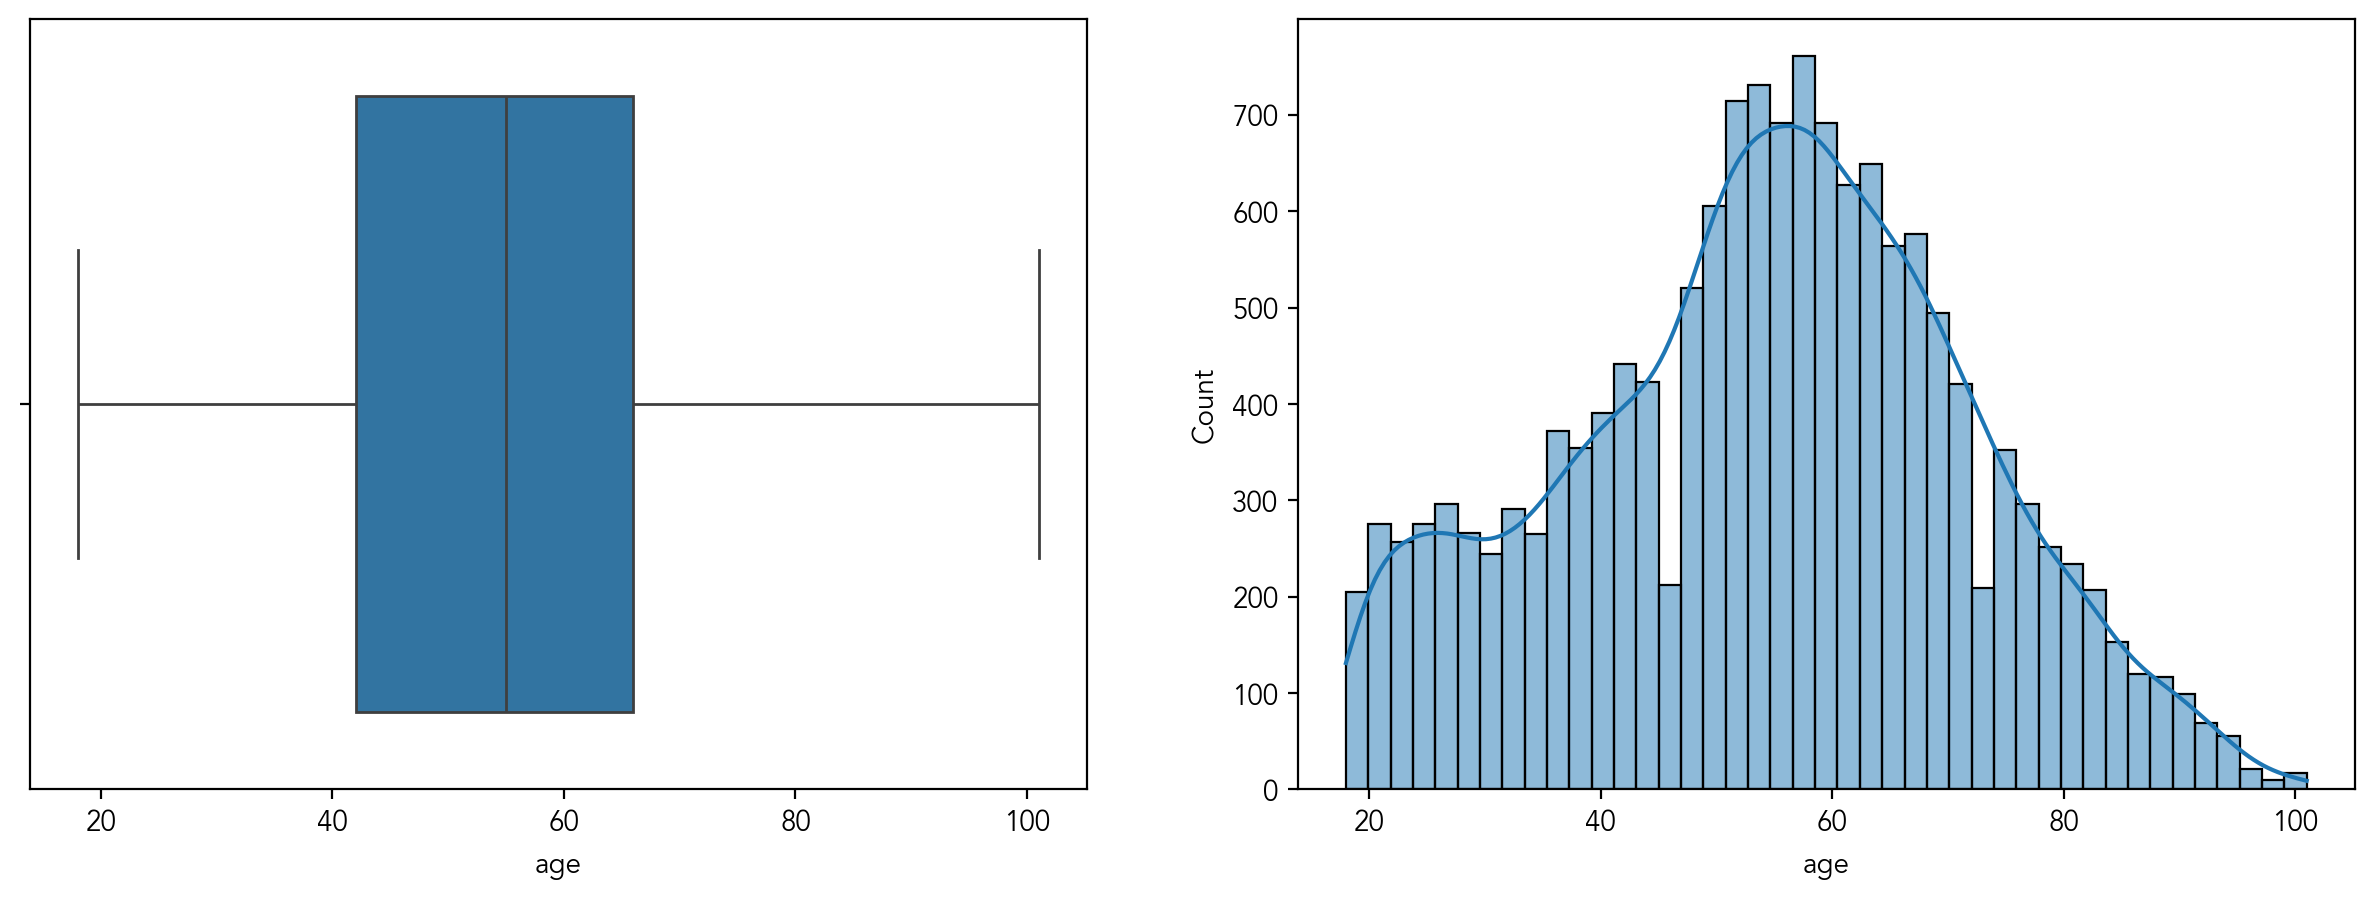

In [32]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(data = df_customer, x = 'age', ax = ax[0])
sns.histplot(data = df_customer, x = 'age', kde = True, ax = ax[1])

<Axes: xlabel='income', ylabel='Count'>

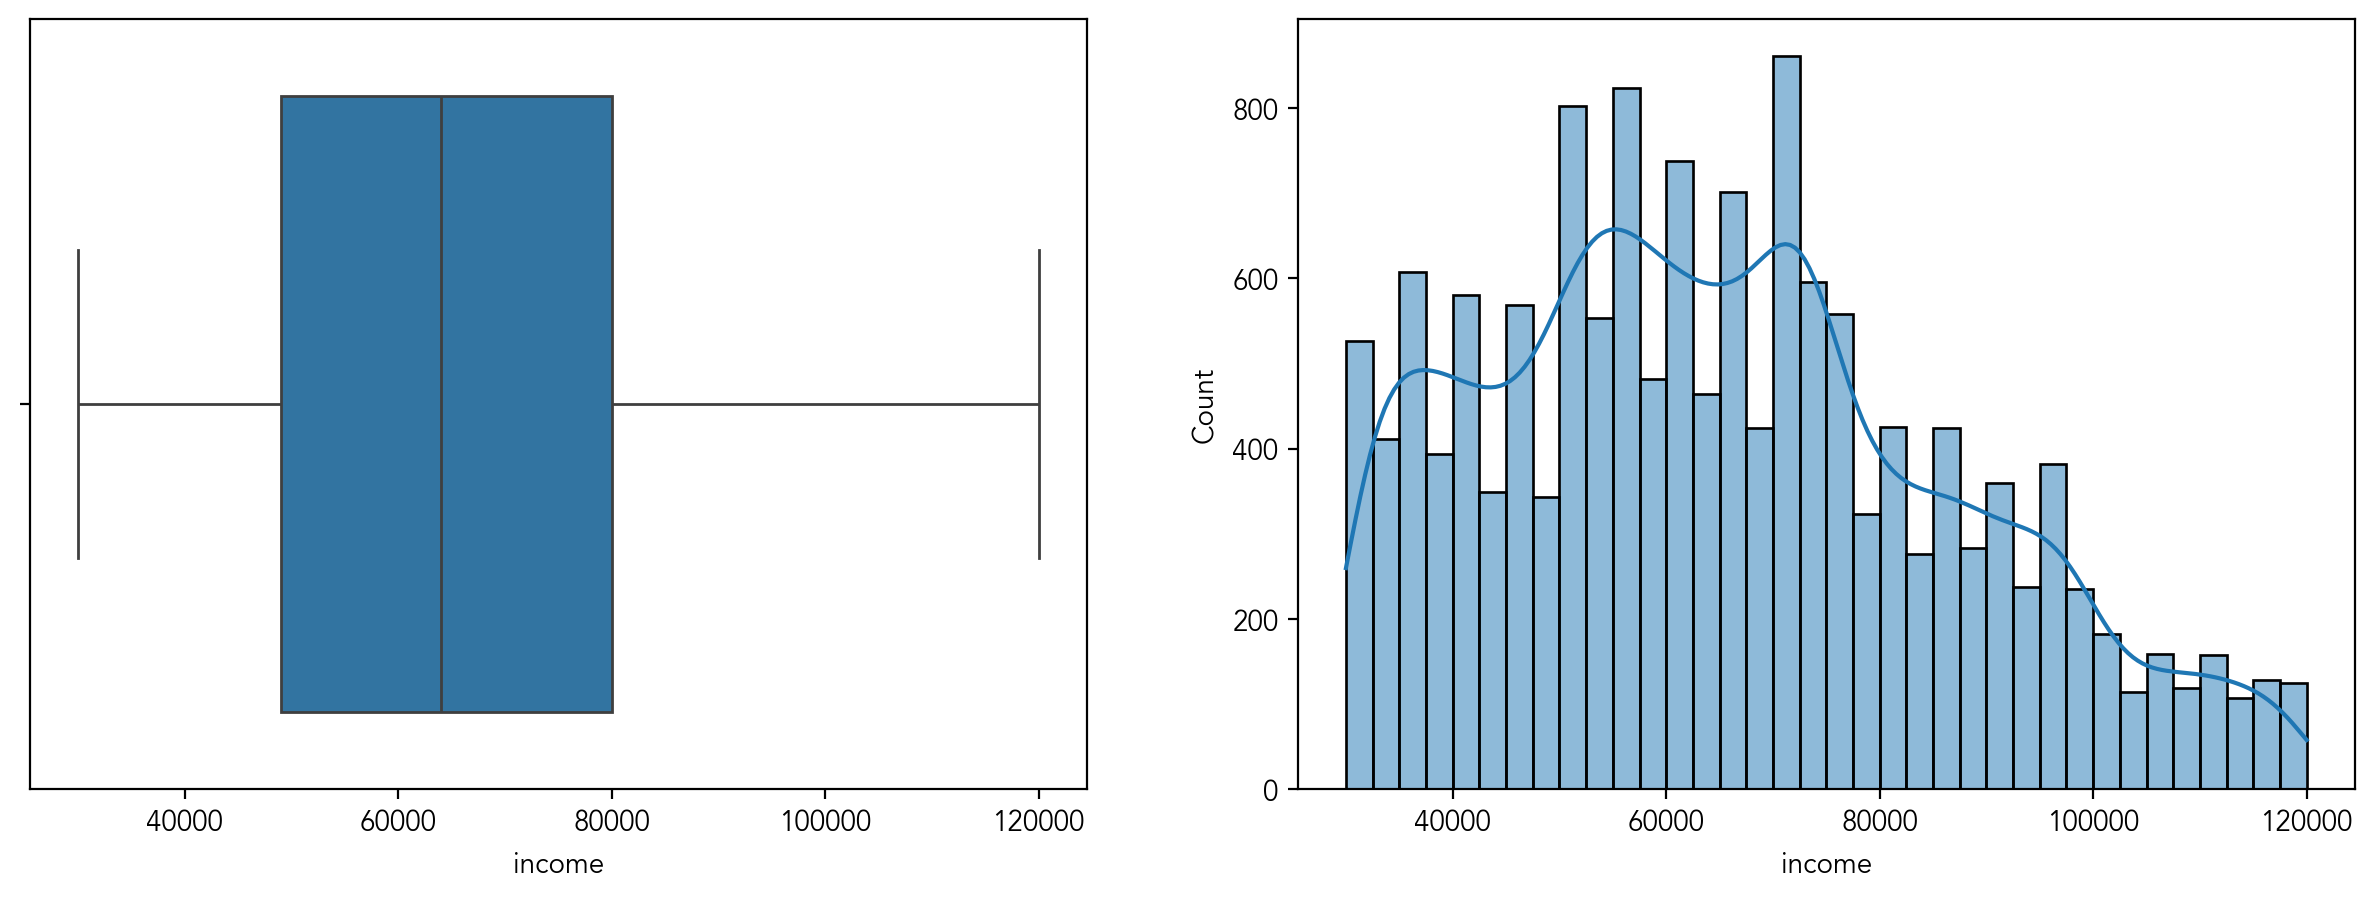

In [33]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(data = df_customer, x = 'income', ax = ax[0])
sns.histplot(data = df_customer, x = 'income', kde = True, ax = ax[1])

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


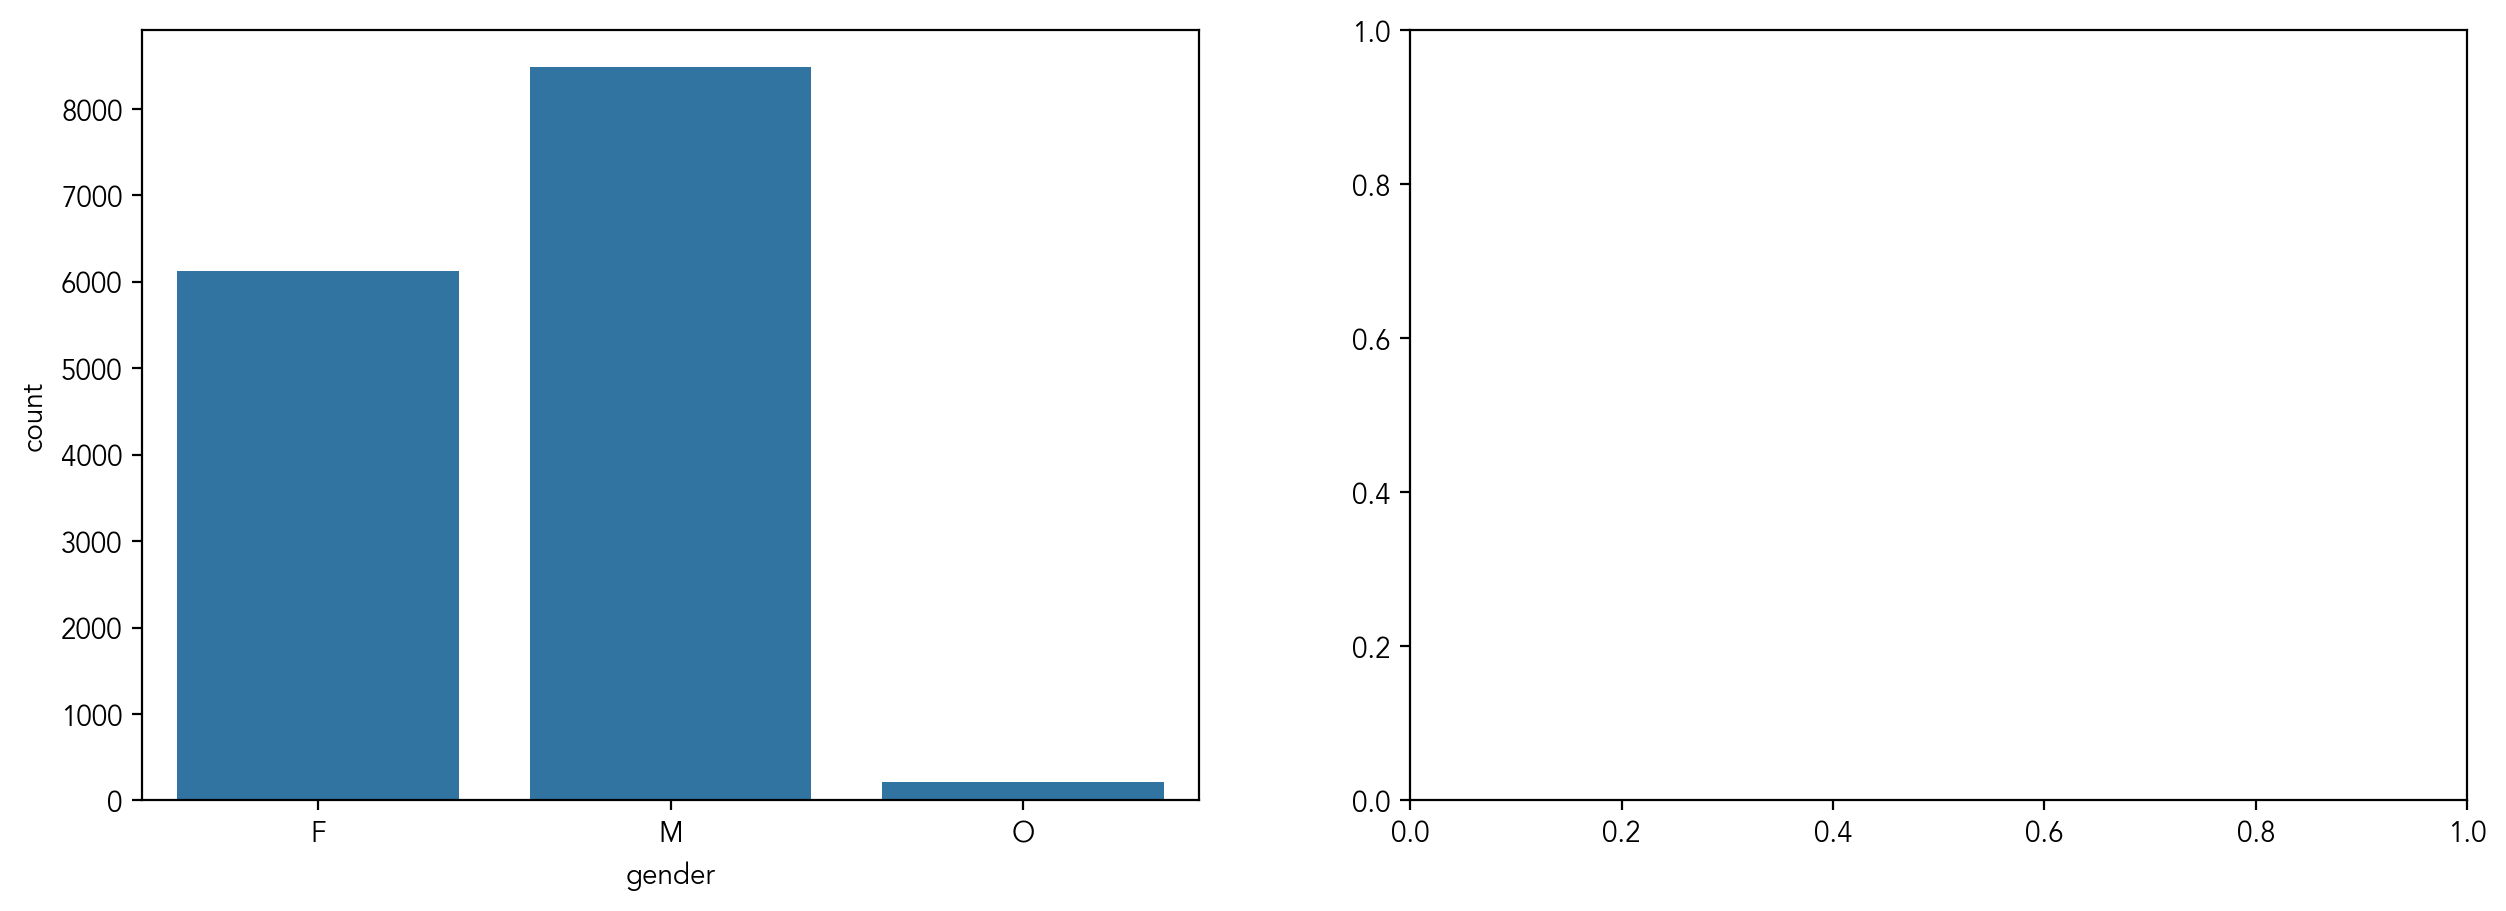

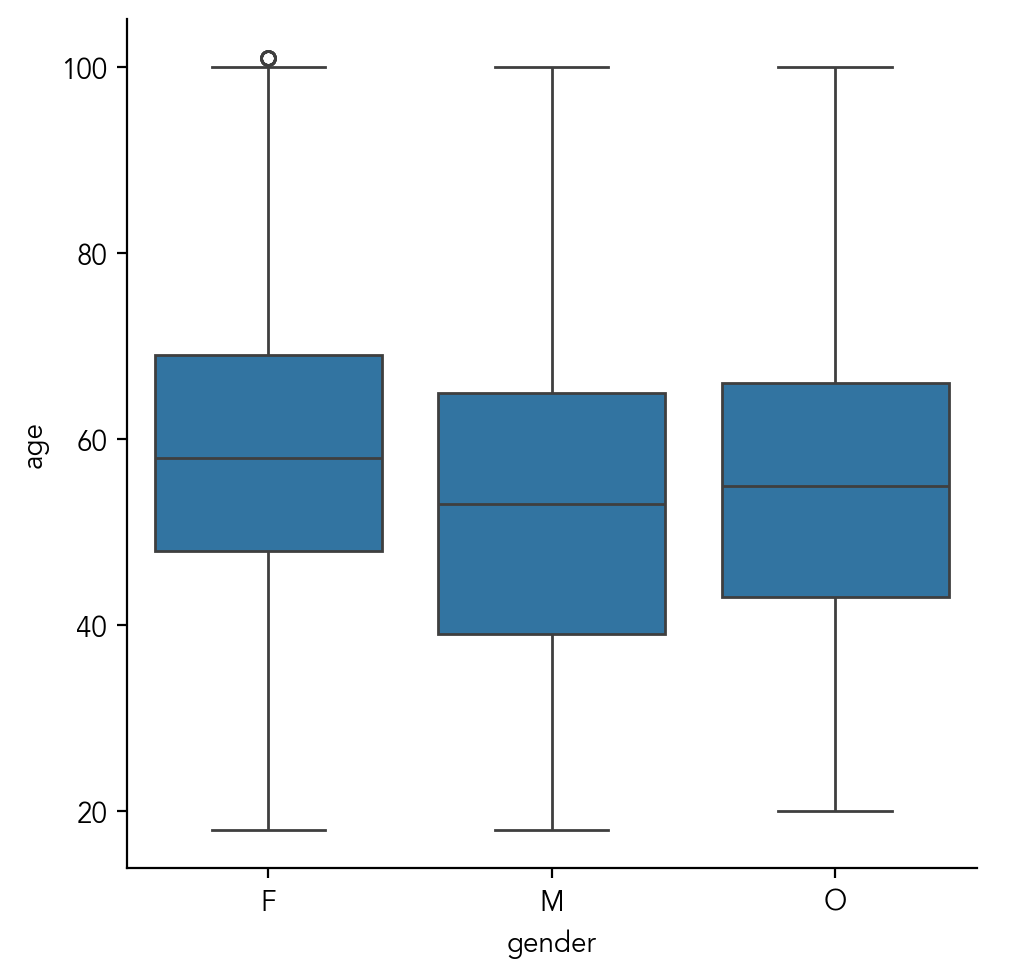

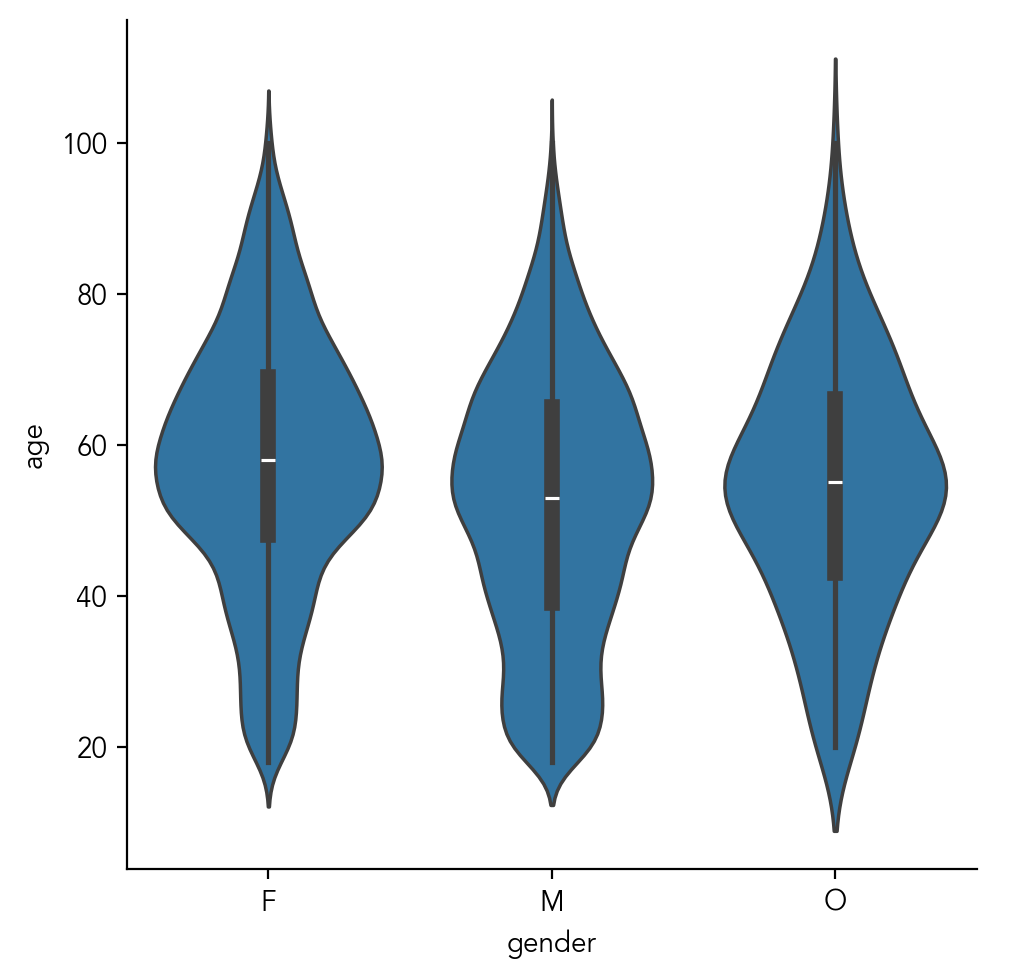

In [34]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(data = df_customer, x = 'gender', ax = ax[0])
sns.catplot(kind = 'box',  data = df_customer, x = 'gender', y = 'age', ax = ax[1])
sns.catplot(kind = 'violin',  data = df_customer, x = 'gender', y = 'age', ax = ax[1])

# EDA Dataset `df_transcript`

In [35]:
df_transcript.head()

,person,event,value,hours_since_start,key
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id


In [36]:
df_offer.head(20)

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [37]:
df_customer.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


# Merging Datasets
- Merge datasets `df_transcript`, `df_customer`, and `df_offer`
- `df_transcript['person']` = `df_customer['id']`
- `df_transcript['value']` = `df_offer['id']`

In [38]:
# Merge df_transcript and df_customer on 'person' and 'id'
df_merged = df_transcript.merge(df_customer, left_on='person', right_on='id', how = 'inner')
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   id                 272762 non-null  object        
 8   became_member_on   272762 non-null  datetime64[ns]
 9   income             272762 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 20.8+ MB


,person,event,value,hours_since_start,key,gender,age,id,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0


In [39]:
# Merge df_merged and df_offer on 'key' and 'id'
df_final = df_merged.merge(df_offer, left_on='value', right_on='id', how = 'left')
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   id_x               272762 non-null  object        
 8   became_member_on   272762 non-null  datetime64[ns]
 9   income             272762 non-null  float64       
 10  reward             148805 non-null  float64       
 11  channels           148805 non-null  object        
 12  difficulty         148805 non-null  float64       
 13  duration           148805 non-null  float64 

,person,event,value,hours_since_start,key,gender,age,id_x,became_member_on,income,reward,channels,difficulty,duration,offer_type,id_y
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Drop 'id_x' and 'id_y' columns from the dataset df_final
df_final.drop(['id_x', 'id_y'], axis = 1, inplace = True)

In [41]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   became_member_on   272762 non-null  datetime64[ns]
 8   income             272762 non-null  float64       
 9   reward             148805 non-null  float64       
 10  channels           148805 non-null  object        
 11  difficulty         148805 non-null  float64       
 12  duration           148805 non-null  float64       
 13  offer_type         148805 non-null  object  

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN


In [42]:
df_final.dtypes

person                       object
event                        object
value                        object
hours_since_start             int64
key                          object
gender                       object
age                           int64
became_member_on     datetime64[ns]
income                      float64
reward                      float64
channels                     object
difficulty                  float64
duration                    float64
offer_type                   object
dtype: object

In [43]:
max(df_final['hours_since_start'])

714

In [44]:
df_final['how_long_mbr'] = max(df_final['became_member_on'])-df_final['became_member_on']

In [45]:
df_final['how_long_mbr'].describe()

count                         272762
mean     581 days 07:00:24.522477488
std      428 days 19:26:41.646240720
min                  0 days 00:00:00
25%                242 days 00:00:00
50%                471 days 00:00:00
75%                862 days 00:00:00
max               1823 days 00:00:00
Name: how_long_mbr, dtype: object

In [46]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   person             272762 non-null  object         
 1   event              272762 non-null  object         
 2   value              272762 non-null  object         
 3   hours_since_start  272762 non-null  int64          
 4   key                272762 non-null  object         
 5   gender             272762 non-null  object         
 6   age                272762 non-null  int64          
 7   became_member_on   272762 non-null  datetime64[ns] 
 8   income             272762 non-null  float64        
 9   reward             148805 non-null  float64        
 10  channels           148805 non-null  object         
 11  difficulty         148805 non-null  float64        
 12  duration           148805 non-null  float64        
 13  offer_type         148805 non

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type,how_long_mbr
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days


In [49]:
df_final.dtypes

person                        object
event                         object
value                         object
hours_since_start              int64
key                           object
gender                        object
age                            int64
became_member_on      datetime64[ns]
income                       float64
reward                       float64
channels                      object
difficulty                   float64
duration                     float64
offer_type                    object
how_long_mbr         timedelta64[ns]
dtype: object

In [51]:
df_final.select_dtypes('object').describe().T

,count,unique,top,freq
person,272762,14825,94de646f7b6041228ca7dec82adb97d2,51
event,272762,4,transaction,123957
value,272762,5046,fafdcd668e3743c1bb461111dcafc2a4,18062
key,272762,3,amount,123957
gender,272762,3,M,155690
channels,148805,4,"['web', 'email', 'mobile', 'social']",69203
offer_type,148805,3,bogo,63834


In [52]:
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
hours_since_start,272762.0,366.707694,0.0,186.0,408.0,528.0,714.0,200.359087
age,272762.0,53.840696,18.0,41.0,55.0,66.0,101.0,17.551337
became_member_on,272762,2016-12-21 16:59:35.477522176,2013-07-29 00:00:00,2016-03-16 00:00:00,2017-04-11 00:00:00,2017-11-26 00:00:00,2018-07-26 00:00:00,NaN
income,272762.0,64337.000755,30000.0,48000.0,62000.0,78000.0,120000.0,21243.762941
reward,148805.0,4.442445,0.0,2.0,5.0,5.0,10.0,3.372362
difficulty,148805.0,7.890561,0.0,5.0,10.0,10.0,20.0,5.041335
duration,148805.0,6.625207,3.0,5.0,7.0,7.0,10.0,2.133035
how_long_mbr,272762,581 days 07:00:24.522477488,0 days 00:00:00,242 days 00:00:00,471 days 00:00:00,862 days 00:00:00,1823 days 00:00:00,428 days 19:26:41.646240720


In [54]:
df_final.memory_usage(deep = True).sum()

141641133

In [56]:
df_final.select_dtypes('object').memory_usage(deep = True).sum()

124184365

In [62]:
result = 124_184_365 / 141_641_133 * 100
print(f"{result:.2f} %")  


87.68 %


# EDA Dataset `df_final`
- Understanding merged dataset `df_final`

In [69]:
(df_final
 .select_dtypes('object')
)

,person,event,value,key,gender,channels,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id,F,"['web', 'email', 'mobile']",bogo
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id,F,"['web', 'email', 'mobile']",bogo
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,amount,F,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_id,F,"['web', 'email', 'mobile']",bogo
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,amount,F,NaN,NaN
...,...,...,...,...,...,...,...
272757,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,3f207df678b143eea3cee63160fa8bed,offer id,M,"['web', 'email', 'mobile']",informational
272758,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,offer id,M,"['web', 'email', 'mobile', 'social']",bogo
272759,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,4d5c57ea9a6940dd891ad53e9dbe8da0,offer id,M,"['web', 'email', 'mobile', 'social']",bogo
272760,3045af4e98794a04a5542d3eac939b1f,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,offer id,F,"['web', 'email', 'mobile', 'social']",bogo


In [66]:
(df_final
    .isna()
    .mean()
    .mul(100)
)

person                0.000000
event                 0.000000
value                 0.000000
hours_since_start     0.000000
key                   0.000000
gender                0.000000
age                   0.000000
became_member_on      0.000000
income                0.000000
reward               45.445113
channels             45.445113
difficulty           45.445113
duration             45.445113
offer_type           45.445113
how_long_mbr          0.000000
dtype: float64

In [73]:
(df_final
    .duration
    .value_counts()
)

duration
7.0     62535
5.0     33221
10.0    30389
3.0     12516
4.0     10144
Name: count, dtype: int64

In [47]:
df_final.head(20)

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type,how_long_mbr
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,5a8bc65990b245e5a138643cd4eb9837,168,offer id,F,75,2017-05-09,100000.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,443 days
6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,5a8bc65990b245e5a138643cd4eb9837,216,offer id,F,75,2017-05-09,100000.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,443 days
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.67,222,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,29.72,240,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,23.93,378,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days


<Axes: xlabel='event'>

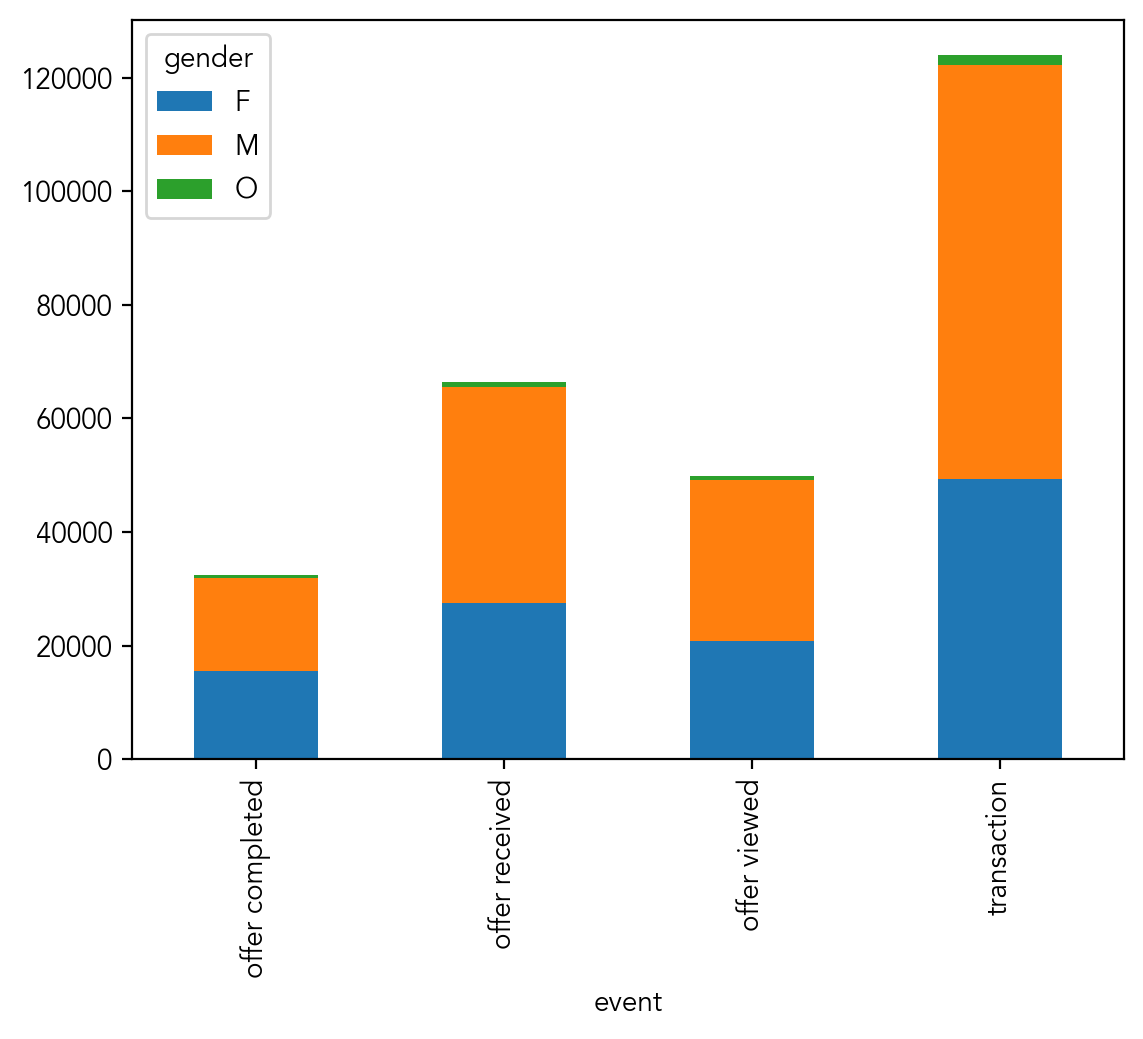

In [74]:
pd.crosstab(df_final['event'], df_final['gender']).plot(kind = 'bar', stacked = True)


<Axes: xlabel='event', ylabel='count'>

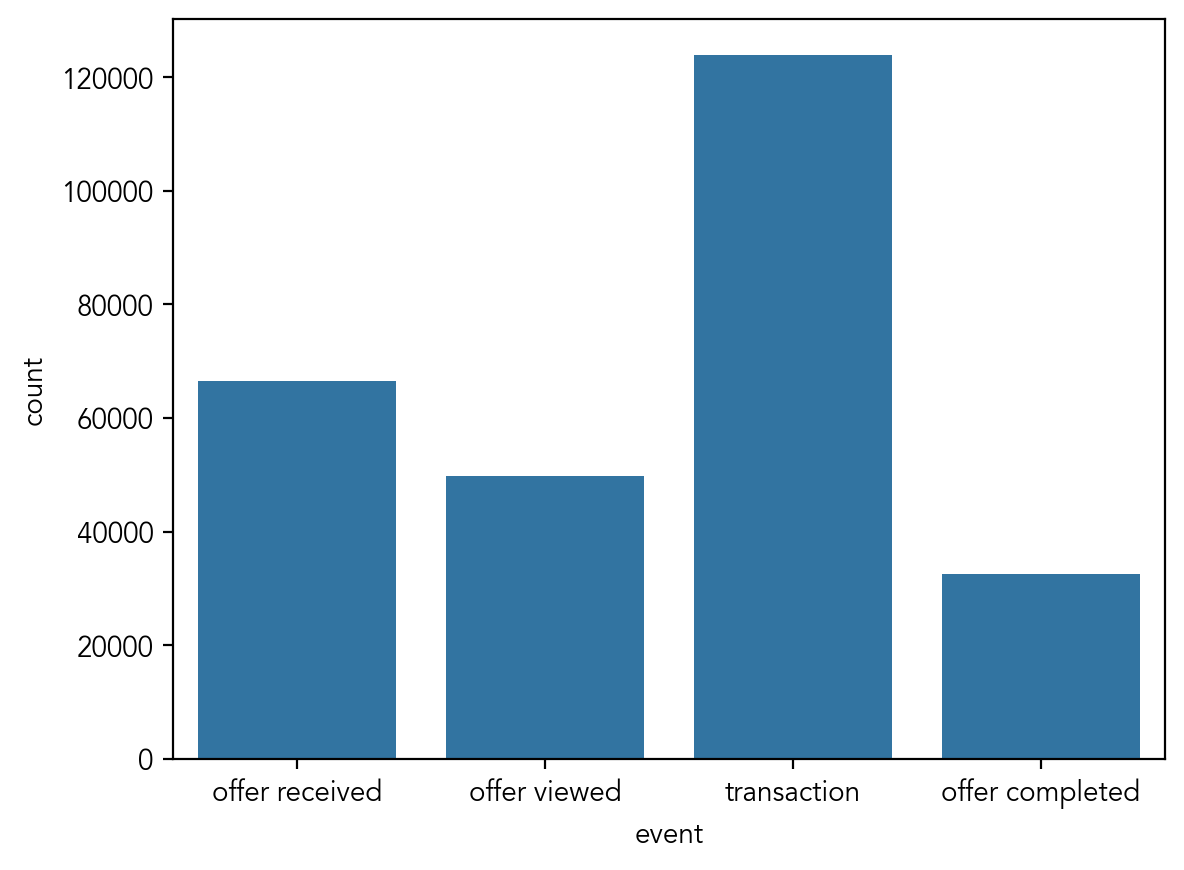

In [92]:
sns.countplot(data = df_final, x = 'event')

# EDA Dataset `df_final_transaction`
- Filter transactioinal data based on the `event` column under `transaction`
- Understanding transactional dataset `df_final_transaction`

In [76]:
df_final_transaction = df_final[df_final['event'] == 'transaction']
df_final_transaction = df_final_transaction.drop(['event', 'key', 'hours_since_start', 'reward', 'channels', 'difficulty', 'duration', 'offer_type'], axis = 1)
df_final_transaction.info()
df_final_transaction.head()

<class 'pandas.core.frame.DataFrame'>
Index: 123957 entries, 2 to 272755
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   person            123957 non-null  object         
 1   value             123957 non-null  object         
 2   gender            123957 non-null  object         
 3   age               123957 non-null  int64          
 4   became_member_on  123957 non-null  datetime64[ns] 
 5   income            123957 non-null  float64        
 6   how_long_mbr      123957 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), timedelta64[ns](1)
memory usage: 7.6+ MB


,person,value,gender,age,became_member_on,income,how_long_mbr
2,78afa995795e4d85b5d9ceeca43f5fef,19.89,F,75,2017-05-09,100000.0,443 days
4,78afa995795e4d85b5d9ceeca43f5fef,17.78,F,75,2017-05-09,100000.0,443 days
7,78afa995795e4d85b5d9ceeca43f5fef,19.67,F,75,2017-05-09,100000.0,443 days
8,78afa995795e4d85b5d9ceeca43f5fef,29.72,F,75,2017-05-09,100000.0,443 days
9,78afa995795e4d85b5d9ceeca43f5fef,23.93,F,75,2017-05-09,100000.0,443 days


In [80]:
(df_final_transaction
    .memory_usage(deep = True)
    .sum()
)

27146583

In [89]:
(df_final_transaction
    .describe()
).T

,count,mean,min,25%,50%,75%,max,std
age,123957.0,52.713965,18.0,39.0,54.0,65.0,101.0,17.906667
became_member_on,123957,2016-10-30 21:28:27.427575808,2013-07-29 00:00:00,2016-01-21 00:00:00,2017-01-22 00:00:00,2017-10-24 00:00:00,2018-07-26 00:00:00,NaN
income,123957.0,61843.51025,30000.0,46000.0,60000.0,74000.0,120000.0,20661.890394
how_long_mbr,123957,633 days 02:31:32.572424312,0 days 00:00:00,275 days 00:00:00,550 days 00:00:00,917 days 00:00:00,1823 days 00:00:00,438 days 20:44:28.614033160


In [82]:
(df_final_transaction
    .select_dtypes('object')
    .describe()
)

,person,value,gender
count,123957,123957.00,123957
unique,14492,5036.00,3
top,8dbfa485249f409aa223a2130f40634a,0.05,M
freq,36,133.00,72794


In [84]:
df_final_transaction.dtypes.T


person                       object
value                        object
gender                       object
age                           int64
became_member_on     datetime64[ns]
income                      float64
how_long_mbr        timedelta64[ns]
dtype: object

In [85]:
(df_final_transaction
    .isna()
    .mean()
    .mul(100)
)

person              0.0
value               0.0
gender              0.0
age                 0.0
became_member_on    0.0
income              0.0
how_long_mbr        0.0
dtype: float64

In [87]:
with pd.option_context('display.max_rows', 30, 'display.max_columns', 30):
    print(df_final_transaction)

                                  person  value gender  age became_member_on  \
2       78afa995795e4d85b5d9ceeca43f5fef  19.89      F   75       2017-05-09   
4       78afa995795e4d85b5d9ceeca43f5fef  17.78      F   75       2017-05-09   
7       78afa995795e4d85b5d9ceeca43f5fef  19.67      F   75       2017-05-09   
8       78afa995795e4d85b5d9ceeca43f5fef  29.72      F   75       2017-05-09   
9       78afa995795e4d85b5d9ceeca43f5fef  23.93      F   75       2017-05-09   
...                                  ...    ...    ...  ...              ...   
272744  47683732768a4f7db7abb710ca22e66e    7.1      M   24       2017-11-08   
272747  3873fe915496482eb589fa316ae7b0db   1.57      M   58       2017-09-05   
272750  3873fe915496482eb589fa316ae7b0db   1.21      M   58       2017-09-05   
272751  3873fe915496482eb589fa316ae7b0db   2.65      M   58       2017-09-05   
272755  8578196a074a4f328976e334fa9383a3   4.62      M   48       2018-06-10   

          income how_long_mbr  
2      

# Handling Outliers (3-sigma)
- Removing outliers from `value` based on the 3-sigma way
- **Transactional dataset**: mean - 3 * std < `value` < mean + 3 * std

In [91]:
# Removing outliers based on the 3-sigma rule

mean = df_final_transaction['value'].mean()
std = df_final_transaction['value'].std()
df_final_transaction = df_final_transaction[(df_final_transaction['value'] > (mean - 3 * std)) & (df_final_transaction['value'] < (mean + 3 * std))]

In [ ]:
df_final_transaction['how_long_mbr_n'] = df_final_transaction['how_long_mbr'].dt.days.astype('int')

In [ ]:
df_final_transaction['value'] = df_final_transaction['value'].astype('float')

In [ ]:
df_final_transaction.isnull().sum()

In [ ]:
df_final_transaction.tail(100)

In [ ]:
df_final_transaction['value'].mean()

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.barplot(data = df_final_transaction, x = 'gender', y = 'value', hue = 'gender', ax = ax[0][0])
ax[0][0].set_title('Average Transaction Value by gender')
ax[0][0].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')

sns.boxplot(data = df_final_transaction, x = 'gender', y = 'value', hue = 'gender', ax = ax[0][1])
ax[0][1].set_title('Box Plot for Transaction Value by gender')
ax[0][1].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')

sns.barplot(data = df_final_transaction, x = 'gender', y = 'how_long_mbr_n', hue = 'gender', ax = ax[1][0])
ax[1][0].set_title('Average Membership Days by gender')
ax[1][0].axhline(df_final_transaction['how_long_mbr_n'].mean(), color = 'r', linestyle = '--')

sns.boxplot(data = df_final_transaction, x = 'gender', y = 'how_long_mbr_n', hue = 'gender', ax = ax[1][1])
ax[1][1].set_title('Box Plot for Average Membership Days by gender')
ax[1][1].axhline(df_final_transaction['how_long_mbr_n'].mean(), color = 'r', linestyle = '--')

plt.subplots_adjust(hspace = 0.3)


In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.histplot(data = df_final_transaction, bins = 30, x = 'age', kde = True, ax = ax[0][0])
ax[0][0].set_title('Histogram for Age')

sns.histplot(data = df_final_transaction, bins = 30, x = 'income', kde = True, ax = ax[0][1])
ax[0][1].set_title('Histogram for Income')

sns.histplot(data = df_final_transaction, bins = 30, x = 'how_long_mbr_n', kde = True, ax = ax[1][0])
ax[1][0].set_title('Histogram for Membership Days')

sns.histplot(data = df_final_transaction, bins = 30, x = 'value', kde = True, ax = ax[1][1])
ax[1][1].set_title('Histogram for Spending')

plt.subplots_adjust(hspace = 0.3)

In [ ]:
# Binning for 'age'
age_bins = [0, 20, 40, 60, 80, 150] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-150'] 
df_final_transaction['age_group'] = pd.cut(df_final_transaction['age'], bins=age_bins, labels=age_labels, right=False)

# Binning for 'income'
income_bins = [0, 50000, 75000, 100000, 150000]
income_labels = ['0-50k', '50k-75k', '75k-100k', '100k-150k']
df_final_transaction['income_group'] = pd.cut(df_final_transaction['income'], bins=income_bins, labels=income_labels, right=False)

# Binning for 'membership days'
income_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
income_labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000']
df_final_transaction['how_long_mbr_n_group'] = pd.cut(df_final_transaction['how_long_mbr_n'], bins=income_bins, labels=income_labels, right=False)


In [ ]:
gender_dummies = pd.get_dummies(df_final_transaction['gender'], drop_first = False)
df_final_transaction = pd.concat([df_final_transaction, gender_dummies], axis = 1)

In [ ]:
df_final_transaction.head()

In [ ]:
df_final_transaction.describe()

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.barplot(data = df_final_transaction, x = 'age_group', y = 'value', hue = 'age_group', ax = ax[0][0])
ax[0][0].set_title('Average Transaction Value by age_group')
ax[0][0].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')

sns.boxplot(data = df_final_transaction, x = 'age_group', y = 'value', hue = 'age_group', ax = ax[0][1])
ax[0][1].set_title('Box Plot for Average Transaction Value by age_group')
ax[0][1].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')


sns.barplot(data = df_final_transaction, x = 'income_group', y = 'value', hue = 'income_group', ax = ax[1][0])
ax[1][0].set_title('Transaction Value by income_group')
ax[1][0].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')

sns.boxplot(data = df_final_transaction, x = 'income_group', y = 'value', hue = 'income_group', ax = ax[1][1])
ax[1][1].set_title('Box Plot for Transaction Value by income_group')
ax[1][1].axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')

# Analysis Correlation in Transactional Dataset

In [ ]:
corr = df_final_transaction.corr(numeric_only = True)
corr

In [ ]:
ones = np.ones_like(corr)
np.triu(ones)
plt.figure(figsize = (11, 8))
sns.heatmap(corr, annot = True, cmap = 'seismic', vmin = -1, vmax = 1, mask = np.triu(ones))

In [ ]:
# Convert 'income' column to numeric type
sns.lmplot(data=df_final_transaction, x='income', y='value',  line_kws={'color': 'red'}, scatter_kws={'alpha':0.01, 'color':'blue'})

In [ ]:
sns.lmplot(data=df_final_transaction, x='age', y='value', line_kws={'color': 'red'}, scatter_kws={'alpha':0.01, 'color':'blue'})

In [ ]:
sns.lmplot(data=df_final_transaction, x='how_long_mbr_n', y='value', line_kws={'color': 'red'}, scatter_kws={'alpha':0.01, 'color':'blue'})

# Confidence Interval, Sample Size Determination, Standard Error

In [ ]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms

# Assuming 'column_name' is the column you are interested in
column = df_final_transaction['value']

# 1. Confidence interval estimation
confidence_level = 0.95
degrees_freedom = len(column) - 1
sample_mean = np.mean(column)
sample_standard_error = stats.sem(column)
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

# 2. Sample size determination
# Assuming 'margin_error' is the acceptable margin of error for a 95% confidence level
margin_error = 0.05
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
standard_deviation = np.std(column)
sample_size = (z_score**2 * standard_deviation**2) / margin_error**2

# 3. Estimation error analysis
standard_error = sample_standard_error / np.sqrt(sample_size)

print(f'Confidence Interval:\t {confidence_interval[0]:.4f} - {confidence_interval[1]:.4f}')
print(f'Sample Size:\t\t {sample_size:.4f}')
print(f'Standard Error:\t\t {standard_error:.4f}')


In [ ]:
sns.barplot(data = df_final_transaction, y = 'value')
plt.title('Average Amount per Transaction')
plt.ylabel('USD/Transaction')
plt.ylim(bottom = 11)
plt.hlines(y = confidence_interval[0], xmin = -1, xmax = 1, color = 'r', linestyle = '--')
plt.hlines(y = confidence_interval[1], xmin = -1, xmax = 1, color = 'b', linestyle = '--')

# Hypothesis Testing for `value` by `gender`

In [ ]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data = df_final_transaction, x = 'value', hue = 'gender', fill = True)

In [ ]:
genders = ['M', 'F', 'O']  # Replace [...] with the actual list of services
f, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, gen in enumerate(genders):
    sm.qqplot(df_final_transaction.loc[df_final_transaction['gender'] == gen, 'value'], line='s', ax=ax[i])
    ax[i].set_title(gen)
    print(i, gen)

In [ ]:
df_final_transaction.groupby(['gender'])['value'].describe()

In [ ]:
# ANOVA test
# Model
model_anova = ols('value ~ C(gender)', data = df_final_transaction).fit()

# ANOVA table
sm.stats.anova_lm(model_anova, typ =2)


In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.histplot(data = df_final_transaction, x = 'value', hue = 'gender', kde = True, ax = ax[0])
sns.boxplot(data = df_final_transaction, y = 'value', hue = 'gender', ax = ax[1])
sns.pointplot(data = df_final_transaction, x = 'value', hue = 'gender', errorbar = 'ci', ax = ax[2])

In [ ]:
# Levene Test
levene_test = stats.levene(df_final_transaction[df_final_transaction['gender'] == 'M']['value'],
                           df_final_transaction[df_final_transaction['gender'] == 'F']['value'],
                           df_final_transaction[df_final_transaction['gender'] == 'O']['value'])

levene_test

# Post Hoc Analysis

In [ ]:
tukey = pairwise_tukeyhsd(endog = df_final_transaction['value'], groups = df_final_transaction['gender'])
print(tukey)

In [ ]:
# Visualizing the post hoc analysis results
tukey.plot_simultaneous(figsize = (8, 6));

# Split Training, Test Dataset and Model

In [ ]:
df_final_transaction

In [ ]:
X = df_final_transaction[['age', 'income', 'how_long_mbr_n', 'F', 'M', 'O']]
y = df_final_transaction['value']
X_train, X_test, y_train, y_test = train_test_split(df_final_transaction[['age', 'income', 'how_long_mbr_n', 'F', 'M', 'O']], df_final_transaction['value'], test_size = 0.2, random_state = 42)


# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predic = model.predict(X_test)
metrics.r2_score(y_test, predic)

In [ ]:
sns.regplot(x = y_test, y = predic, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color': 'red'})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = y_test
preds = predic

# MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
# MSLE = mean_squared_log_error(true, preds)
# RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

# 출력
# print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
# print(f'MSLE:\t {MSLE:.4f}')
# print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

# Random Forest Regression

In [ ]:
# Training the Model and Making Predictions
model_r = RandomForestRegressor(n_estimators=100, random_state=42)
model_r.fit(X_train, y_train)
predic_r = model_r.predict(X_test)
metrics.r2_score(y_test, predic_r)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # GridSearchCV object 
# grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # Grid Search
# grid_search.fit(X_train, y_train)

# # Optimal hyperparameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", -grid_search.best_score_)

In [ ]:
# Training the Model and Making Predictions
model_r = RandomForestRegressor(
            bootstrap=True,
            max_depth=30,
            max_features='sqrt',
            min_samples_leaf=4,
            min_samples_split=5,
            n_estimators=300,
            random_state=42
            )
model_r.fit(X_train, y_train)
predic_r = model_r.predict(X_test)
metrics.r2_score(y_test, predic_r)

In [ ]:
# Visualization of the model prediction results
sns.regplot(x = y_test, y = predic_r, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color': 'red'})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Model')

In [ ]:
true = y_test
preds = predic_r

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

# XG Boost Regressor

In [ ]:
model_x = XGBRegressor(random_state=42)
model_x.fit(X_train, y_train)
predic_x = model_x.predict(X_test)
metrics.r2_score(y_test, predic_x)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# # GridSearchCV object
# grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# # Grid Search
# grid_search.fit(X_train, y_train)

# # Optimal hyperparameters and score
# print("Best Parameters:", grid_search.best_params_)

# # Predict with the best model
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)

# # Model evaluation
# from sklearn import metrics
# print("R^2 score:", metrics.r2_score(y_test, predictions))

In [ ]:
model_x = XGBRegressor(
            colsample_bytree=1.0,
            gamma=0.1, 
            learning_rate=0.1, 
            max_depth=7, 
            min_child_weight=5, 
            n_estimators=300, 
            subsample=1.0
)

model_x.fit(X_train, y_train)
predic_x = model_x.predict(X_test)
metrics.r2_score(y_test, predic_x)

# Standardizing dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.describe()


# Linear Regression with Scaled Dataset

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predic = model.predict(X_test_scaled)
metrics.r2_score(y_test, predic)

# Random forest Regressor with Scaled Dataset

In [ ]:
# Training the Model and Making Predictions
model_r = RandomForestRegressor(
            bootstrap=True,
            max_depth=30,
            max_features='sqrt',
            min_samples_leaf=4,
            min_samples_split=5,
            n_estimators=300,
            random_state=42
            )
model_r.fit(X_train_scaled, y_train)
predic_r = model_r.predict(X_test_scaled)
metrics.r2_score(y_test, predic_r)

# XG Boost Regressor with scaled dataset

In [ ]:
model_x = XGBRegressor(
            colsample_bytree=1.0,
            gamma=0.1, 
            learning_rate=0.1, 
            max_depth=7, 
            min_child_weight=5, 
            n_estimators=300, 
            subsample=1.0
)

model_x.fit(X_train_scaled, y_train)
predic_x = model_x.predict(X_test_scaled)
metrics.r2_score(y_test, predic_x)

# Project Checklist




## 기술통계 및 추정 (7)

 데이터셋의 전체 구조 파악 (변수의 종류, 데이터의 크기 등) > 3-1. Understand Data

 기술통계량 계산 (평균, 중앙값, 분산, 표준편차 등) > 3-2. Data Cleaning

 데이터 분포 탐색 (정규성 검정, 왜도 및 첨도 분석) > 4. EDA

 이상치 탐색 및 처리 > 3-2. Data Cleaning

 결측치 탐색 및 처리 > 3-2. Data Cleaning

 상관관계 분석 > Analysis Correlation of Features in Transactional Dataset

 시각화를 통한 데이터 탐색 (히스토그램, 박스플롯, 산점도 등) > 4. EDA



## 추정 (3)

 모집단의 특성 추정 (신뢰구간 계산) > Confidence Interval, Sample Size Determination, Standard Error

 표본 크기 결정 > Confidence Interval, Sample Size Determination, Standard Error

 추정 오차 분석 > Confidence Interval, Sample Size Determination, Standard Error



## 검정 (5)

 가설 설정: 귀무가설과 대립가설 > Hypothesis Testing for 'value' by 'gender'

 적절한 검정 방법 선택: t-검정, 카이제곱 검정, ANOVA 등 > Hypothesis Testing for 'value' by 'gender'

 검정 수행 및 결과 해석 > Hypothesis Testing for 'value' by 'gender'

 검정의 유의성 평가: p-값, 신뢰구간 > Hypothesis Testing for 'value' by 'gender'

 검정 결과에 대한 해석 및 결론 도출 > Post Hoc Analysis



## 회귀 분석 (4)

 회귀 모델 선택: 선형 회귀, 다중 회귀, 로지스틱 회귀 등 

 회귀 계수 해석: 각 독립 변수의 영향력 파악 

 모델 적합도 검증: 결정 계수(R²), 잔차 분석 등

 다중공선성 진단: VIF 등을 통한 독립 변수 간 상호 의존성 검사 